<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada 2021</h1>
<h2>Pràctica 4 - Programació dinàmica</h2>
</center>
</div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt
import scipy.ndimage as nd
from tqdm.notebook import trange

%matplotlib inline

## Introducció a la llibreria _numpy_. Llistes vs arrays

In [3]:
# Els tractem igual tot i que són dos tipus de dades diferents
a = [1,2,3,4]
b = np.array([1,2,3,4])

print(a, type(a))
print(b, type(b))

[1, 2, 3, 4] <class 'list'>
[1 2 3 4] <class 'numpy.ndarray'>


In [4]:
# La suma de llistes i la suma d'arrays es comporta diferent
a1, a2 = [1,2,3,4], [5,6,7,8]
b1, b2 = np.array([1,2,3,4]), np.array([5,6,7,8])

print(a1+a2)
print(b1+b2)

[1, 2, 3, 4, 5, 6, 7, 8]
[ 6  8 10 12]


In [5]:
# Accedim a la dimensió d'una matriu de tamany 2x3. Observeu que la primera component és l'alçada i la segona l'amplada.
a = [[1,2,3], [4,5,6]]
b = np.array([[1,2,3],[4,5,6]])

print(len(a), len(a[0]))
print(b.shape)

2 3
(2, 3)


In [6]:
# Indexem igual per accedir a les files
print(a[0])
print(b[0])
print()
# En numpy podem seleccionar un element usant b[i,j] de la mateixa forma que podem fer b[i][j]
print(a[0][1])
print(b[0][1], b[0,1])

[1, 2, 3]
[1 2 3]

2
2 2


In [7]:
# Podem definir el 'tipus' de dada que volem fer servir
b1 = np.array([1,2,3,4], dtype=int)
b2 = np.array([1,2,3,4], dtype=float)

print(b1)
print(b2)

[1 2 3 4]
[1. 2. 3. 4.]


## Conceptes bàsics imatges

Una imatge en color, RGB, no és més que una matriu tridimensional $W\times H\times 3$ on $W$ és l'amplada, $H$ és l'alçada i 3 són els canals R (Red), G (Green), B (Blue).

<img src="./img/rgb.png" width=20%>

Shape: (32, 32, 3)


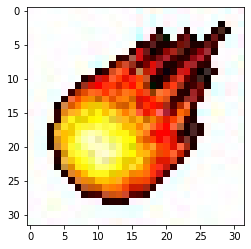

In [8]:
# Carreguem una imatge petita
# Generalment les imatges tenen valors de 0 a 255. Nosaltres treballarem en el rang 0 a 1 i per això dividim tots els valors per 255.
im = plt.imread('img/fireball.jpg')/255

# Així podem observar la seva mida.
print("Shape:",im.shape)

# Podem visualitzar-la utilitzant la funció 'imshow' de la llibreria matplotlib.pyplot
plt.imshow(im)
plt.show()

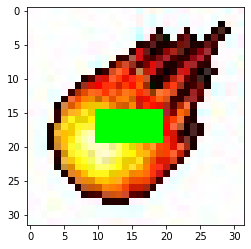

In [9]:
# Podem modificar-la utilitzant slicing
# Observeu que li assignem el color verd ja que [0, 1, 0] = [R, G, B] = [Red, Green, Blue]
im[15:20, 10:20] = [0,1,0]
plt.imshow(im)
plt.show()

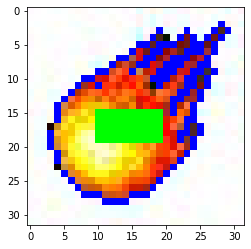

In [10]:
# També podem modificar-la usant una condició sobre els seus píxels
# Tots els píxels tals que la seva component blava (2a component, índex 1) sigui igual a zero,
# la transformem en color blau (0,0,1).
# Com podeu veure el color negre pur és [0,0,0] i, com que té la segona component blava a zero, 
# queda transformat en blau.

im[im[:,:,1] == 0] = [0,0,1]

plt.imshow(im)
plt.show()

<div class="alert alert-success">
    <h1>Problema 1: Implementació de l'algorisme Seam Carving</h1>
    <p>
        L'algorisme Seam Carving ens permet reduir la mida de les imatges en una de les seves dues dimensions (horitzontalment, per exemple) a través d'un algorisme senzill de programació dinàmica. Ens permet fer la següent reducció:
    </p>    
    <img src='img/seamcarving.jpg' width='60%'>
    <b>Sembla màgia, no?</b><br><br>
    S'agafa la imatge original i se'n calcula el gradient. A continuació es generen tots els camins a través de la programació dinàmica, es troba un camí mínim i s'elimina. Es repeteix aquest procediment fins a obtenir el resultat desitjat. Observa'n un altre exemple:
    <img src='img/seamcarving_alg.png' width='80%'><br>
    En aquest cas hem reduit la imatge original en 150 píxels, horitzontalment. Com veieu, la major part dels objectes es conserven ja que s'han eliminat zones 'suaus' com el cel i la sorra.
    <br><br>
    <h3>Implementació</h3>
    <ol>
        <li> Implementeu una funció <code>superior_neighbors</code> que retorni els veïns superiors d'un punt d'una imatge 2-D. A la capçalera de la funció trobareu els tres casos que cal tenir en compte
        <li> Implementeu una funció <code>minimal_paths</code> que, usant el següent algorisme de programació dinàmica, construeixi la matriu de camins, $D$. Aquesta funció ha d'usar la funció <code>superior_neighbors</code> per obtenir els veïns.<br>
            Sigui $G$ la imatge de gradient i sigui $D$ la matriu de camins mínims que hem d'omplir, ambdues de dimensió $H \times W$ :
            $$D_{i,j} = \begin{cases}
                            G_{i,j}+\min\Big(D_{i-1, j},\ D_{i-1,j+1}\Big) \quad \text{if} \ j=0\\
                            G_{i,j}+\min\Big(D_{i-1, j-1},\ D_{i-1, j}\Big) \quad \text{if} \ j=W-1\\
                            G_{i,j}+\min\Big(D_{i-1, j-1},\ D_{i-1, j},\ D_{i-1,j+1}\Big) \quad \text{else}                                      
                        \end{cases}$$
        <li> Implementeu una funció <code>find_min_path</code> que retorni el camí mínim sobre la imatge anterior, $D$. Per trobar-lo, l'algorisme ha de començar per la part inferior de la imatge i anar pujant fins a arribar a la part superior.
        <li> Implementeu una funció <code>delete_path</code> que elimini el camí mínim retornat per la funció anterior de la imatge original.
        <li> Implementeu una funció <code>reduce_image</code> que repeteixi tot el procés anterior un nombre finit de vegades, $N$.
    </ol>
</div>

Funcions auxiliars:

In [11]:
def get_gradient(im):
    """
    Donada una imatge, en calcula el gradient
    
    Params
    ======
    :im: Imatge de la que en volem calcular el gradient
    
    Returns
    =======
    :gradient: Gradient horitzontal de la imatge
    
    """
    # Transformem la imatge a un sol canal (blanc i negre)
    im_blackwhite = np.dot(im[...,:3], [0.299, 0.587, 0.114])
    
    # Calculem el gradient usant sobel
    gradient = np.abs(nd.sobel(im_blackwhite))
    return gradient

def show_row(im_and_titles):
    """
    Donat un conjunt d'imatges i els seus títols, els mostra en una sola línia
    
    Params
    ======
    :im_and_titles: Llista de tuples en el format [(im, title), ...]    
    """
    
    # Creem una figura d'una sola línia
    fig, axs = plt.subplots(1,len(im_and_titles),figsize=(len(im_and_titles)*8,5))
    
    # Iterem el conjunt d'imatges i mostrem la imatge amb el seu títol
    for i, (im, title) in enumerate(im_and_titles):
        axs[i].imshow(im)
        axs[i].set_title(title)
        axs[i].set_axis_off()

    plt.tight_layout()
    plt.show()
    
def add_min_path(im, path, color=[1,0,0]):
    """
    Donada una imatge i un camí, afegeix el camí en un color donat. Per defecte, vermell.
    
    Params
    ======
    :im: Imatge sense el camí
    :path: Camí que volem afegir
    :color: Color del camí
    
    Returns
    =======
    :im: Imatge amb el camí afegit
    """
    for i, j in path:
        im[i][j]=color
    return im

Exemple d'ús:

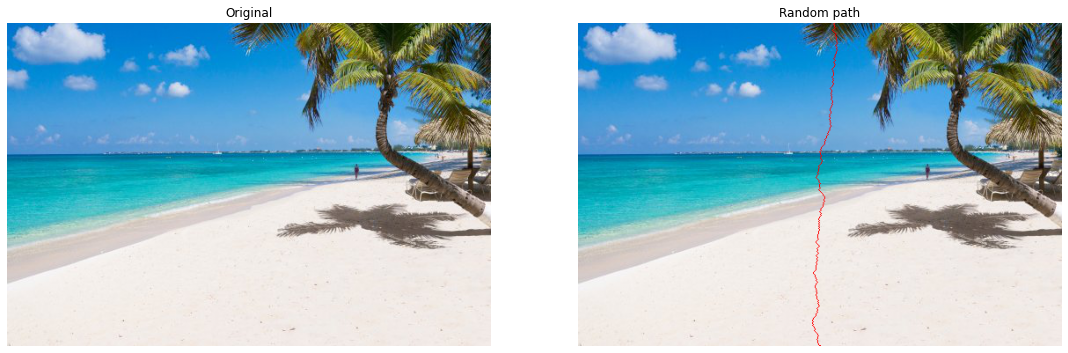

In [12]:
# Carreguem una imatge
im = plt.imread('img/beach.jpg')/255

# Creem un camí aleatori
i = im.shape[0]-1
path = [(i, im.shape[1]//2)]
while i >= 0:
    path.append((i, min(max(0, path[-1][1] + random.randint(-1,1)),im.shape[1]-1)))
    i-=1

# Afegim el camí a una imatge diferent
im_path = im.copy()
im_path = add_min_path(im_path, path)

# Usem la funció show_row per mostrar les imatges amb els seus títols.
im_titles = [(im, 'Original'), (im_path, 'Random path')]
show_row(im_titles)

## Gradient horitzontal

El <b>gradient horitzontal</b> d'una imatge ens permet trobar els punts de màxim canvi <b>vertical</b> en una imatge. Dit d'una altra forma, ens ressalta els contorns verticals.<br><br>
Observeu com podem usar la funció <code>get_gradient()</code> que us donem implementada:

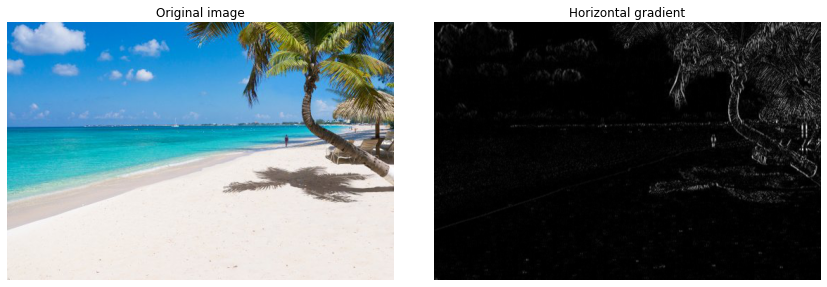

In [13]:
im = plt.imread('img/beach.jpg')/255

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Mostrem la imatge
axs[0].imshow(im)
axs[0].set_title('Original image')
axs[0].set_axis_off()

# Mostrem el gradient horitzontal de la imatge
gradient = get_gradient(im)
axs[1].imshow(gradient, cmap='gray')
axs[1].set_title('Horizontal gradient')
axs[1].set_axis_off()

plt.tight_layout()
plt.show()

In [14]:
def superior_neighbors(mat, point):
    """
    Donada una matriu de mida H x W i punt, retorna els punts de la fila superior adjacents al punt passat com a paràmetre.
    Cal tenir en compte els següents casos. Considerant que el punt té coordenades (i,j):
        - Si el punt té coordenada j=0, vol dir que estem agafant un punt del marge esquerre de la imatge. Només s'han de retornar DOS veïns.
        - Si el punt té coordenada j=(W-1), vol dir que estem agafant un punt del marge dret de la imatge. Només s'han de retornar DOS veïns.
        - En la resta de casos, es retornen els tres veïns superiors.
        
    Params
    ======
    :mat: Una matriu 2-Dimensional
    :point: Un sol punt amb el format (i,j)
    
    Returns
    =======
    :neighbors: Una llista de dos o tres elements en funció de cada cas.
    """
    # Guardem les dos coordenades del point per tal d'accedir més fàcilment
    i = point[0]
    j = point[1]
    
    # Cas en que el punt es trobi en la primera fila (no tindrà superior neighbors)
    if i == 0:
        return []
    
    # Cas en que estem agafant un punt del marge esquerra de la imatge (només tindrà 2 veins superiors: l'immediatament
    # adalt, i a la diagonal dreta)
    if j == 0:
        return mat[i-1,j:j+2]
    
    # Cas en que estem agafant un punt del marge dret de la imatge (només tindrà 2 veins superiors: l'immediatament
    # adalt, i a la diagonal esquerrra)
    if j == mat.shape[1]-1:
        return mat[i-1,j-1:j+1]
    
    # En qualsevol altre cas, retorna els tres veïns superiors
    return mat[i-1,j-1:j+2]

def minimal_paths(mat):
    """
    Creació de tots els camins mínims usant programació dinàmica.
    Cal usar la funció 'superior_neighbors' per trobar els veïns.
    
    Params
    ======
    :mat: Matriu 2-Dimensional d'entrada (gradient)
    
    Returns
    =======
    :ret: Matriu 2-Dimensional de la mateixa mida que 'mat' amb els camins mínims calculats.
    """    
    # Guardem les dimensions de la matriu
    [i, j] = mat.shape
    
    # Fem la còpia de la matriu (podem editar directament mat, ja que és la matriu de gradients i només caldria sumar el mínim)
    ret = mat
    
    # Calculem la distància mínima per a cada cel·la de la matriu
    for x in range(1,i):
        for y in range(j):
            
            # Trobem el mínim dels veins superiors fent ús de la funció superior_neighbors
            minim = np.min(superior_neighbors(mat, [x,y]))
            
            # Anem creant la matriu D
            ret[x][y] = mat[x][y] + minim
            
    return ret

def find_min_path(mat):
    """
    Donada una matriu, calcula el camí mínim sobre aquesta. L'algorisme ha de començar per la part inferior i buscar el següents punts.
    
    Params
    ======
    :mat: Matriu de camins mínims
    
    Returns
    =======
    :min_path: Una llista de tuples amb les coordenades (i,j) del camí mínim. La primera coordenada ha d'anar decrementant sempre en 1.
               Exemple. Suposant que una imatge té d'alçada 341 píxels, un possible camí seria: [(340, 120), (339, 121), (338,120), ..., (0, 151)] 
    """
        
    # Primer agafem les coordenades inicials del camí mínim i les posem al path mínim
    fila_inici = mat.shape[0]-1
    
    # Utilitzem argmin per trobar la posició on es troba el mínim de l'última fila
    columna_inici = np.argmin(mat[-1], 0)
    
    min_path = [(fila_inici, columna_inici)]
    
    # Inicialitzo una llista de veïns que utilitzarem a l'hora d'iterar
    neighbors = []
    
    # Mirem per cada iteració quin és el camí mínim per la cel·la actual
    fila_actual = fila_inici
    columna_actual = columna_inici
    
    # El tercer paràmetre del range indica que començarem per la part inferior 
    for i in range(len(mat)-2, -1, -1):
        # La fila sempre anirà restant 1
        fila_actual -= 1
        
        # Guardem a la llista de veïns el que ens retorni el mètode superior_neighbors en el punt actual
        neighbors = superior_neighbors(mat, [fila_actual, columna_actual])
        
        # Si la llista no està buida, busquem en quina posició de la llista es troba el mínim
        if (len(neighbors) != 0):
            pos_min = np.argmin(neighbors, 0)
        
        # Si la llista conté tres veïns
        if(len(neighbors) == 3):
            # Si es troba a la posició 0, vol dir que haurem d'anar una columna a l'esquerra
            if(pos_min == 0):
                columna_actual -= 1
                
            # Si es troba a la posició 2, vol dir que haurem d'anar una columna a la dreta    
            elif(pos_min == 2):
                columna_actual += 1
        
        # Si la llista conté dos veïns
        if(len(neighbors) == 2):
            # Si es troba a la posició 0 i la columna actual és del marge dret, vol dir que haurem d'anar una columna a l'esquerra
            if(pos_min == 0 and columna_actual == mat.shape[1]-1):
                columna_actual -= 1
            
            # Si es troba a la posició 1 i la columna actual és del marge esquerra, vol dir que haurem d'anar una columna a la dreta
            elif(pos_min == 1 and columna_actual == 0):
                columna_actual += 1
                
        # Si no compleix cap de les condicions anteriors, haurem de quedar-nos en la mateixa columna
        
        # Anem afegint al min_path les coordenades del path que estem creant
        min_path.append((fila_actual, columna_actual))
  
    return min_path


def delete_path(im, path):
    """
    Donat una imatge i un camí, elimina els pixels de la imatge que pertanyen del camí.
    Podeu usar la següent instrucció per inicialitzar la imatge. Això crea una imatge amb tots els valors a zero.
    
    im_new = np.zeros((im.shape[0], im.shape[1]-1, im.shape[2]))
    
    Params
    ======
    :im: Una imatge de mida H x W x 3
    :path: Un camí sobre la imatge. 
    
    Returns
    =======
    :im_new: Una nova imatge de mida H x (W-1) x 3 amb el camí eliminat
    """
    # Guardem el shape de la imatge
    shape = im.shape
    
    # Creem una nova matriu amb la shape de la imatge inicial i de tipus boolean (totes les posicions seran
    # iniciades a True)
    im_new = np.ones((im.shape), dtype = bool)
    
    # Iterem per a cada coordenada del path i canviem la posició a False (serà el camí que haurem d'eliminar)
    for i, j in path:
        im_new[i, j] = False
    
    # Canviem la matriu inicial eliminant les posicions en que hi hagi False (és com si fesim una màscara)
    im = im[im_new]
    
    # Al fer el pas anterior, tenim una matriu flattened, llavors haurem de fer un reshape sabent que tindrem una columna
    # menys al haver eliminat el path
    im = np.reshape(im, (shape[0], shape[1]-1, shape[2]))
    
    return im

def reduce_image(im, N=100):    
    # Fem la primera eliminació fora de la iteració per tal de poder mostrar el primer camí que eliminem
    
    # Obtenim el gradient de la imatge
    G = get_gradient(im)
    
    # Calculem els camins mínims donada la matriu de gradients
    D = minimal_paths(G)
    
    # Amb la matriu D trobarem el path mínim que comença des de l'última fila i acaba a la primera
    y = find_min_path(D)
    
    # Fem la còpia de la matriu i pintem el primer path que elimina
    first_path = im.copy()
    first_path = add_min_path(first_path, y)
 
    # Creem una nova imatge en la que hem eliminat el path anterior
    updated = delete_path(im, y)

    # Iterem N-1 vegades ja que la primera iteració l'hem fet fora del bucle
    for i in range(N-1):
        # Repetim els passos explicats anteriorment N-1 vegades
        G = get_gradient(updated)
        D = minimal_paths(G)
        y = find_min_path(D)
        updated = delete_path(updated, y)
           
    # Usem la funció show_row per mostrar les imatges amb els seus títols.
    im_titles = [(im, 'Original'), (first_path, 'Primer camí que elimina'), (updated, 'Imatge resultant')]
    show_row(im_titles)

Comproveu la vostra solució

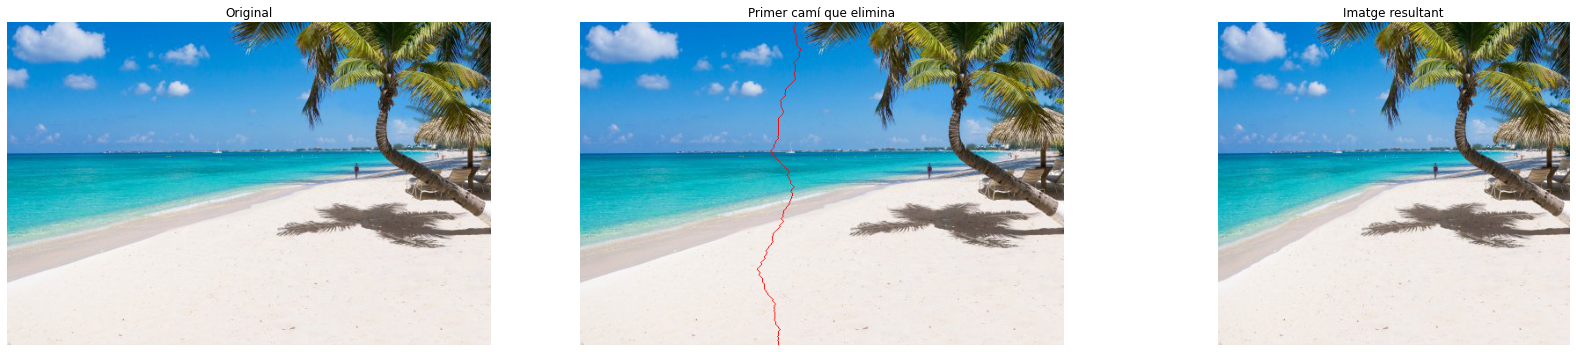

In [15]:
im = plt.imread('img/beach.jpg')/255
reduce_image(im, 150)

<div class="alert alert-success">
    <h1>Problema 2: Eliminar objectes d'una imatge</h1>
    <p>Modifiqueu l'algorisme anterior per a eliminar objectes d'una imatge. Només heu d'implementar la funció <code>remove_patch</code>. <br>Per exemple:</p>
    <img src='img/im_patched.png' width='80%'>
    <b>Pista:</b> Ens hem d'assegurar que els camins mínims sempre passin per l'interior del patch.
</div>

In [16]:
# He modificat el get_gradient que se'ns donava a l'exercici anterior per tal de modificar el gradient en els punts que passa el patch
# Per a cada columna que conté el patch, al gradient se li assigna un número negatiu per tal d'obligar que els camins mínims sempre passin
# per l'interior del patch

def get_gradient_v2(im, i):
    """
    Donada una imatge, en calcula el gradient
    
    Params
    ======
    :im: Imatge de la que en volem calcular el gradient
    :i: Número de columna que s'està eliminant
    
    Returns
    =======
    :gradient: Gradient horitzontal de la imatge
    
    """
    
    # Transformem la imatge a un sol canal (blanc i negre)
    im_blackwhite = np.dot(im[...,:3], [0.299, 0.587, 0.114])
    
    # Calculem el gradient usant sobel
    gradient = np.abs(nd.sobel(im_blackwhite))
    
    # Fem ús de slicing per assignar el valor negatiu als punts de dins del patch
    gradient[patch[0][0]:patch[1][0]+1, patch[0][1]:patch[0][1]+1+i] = -100
    
    return gradient

def add_patch(im, patch):
    """
    Donada una imatge i un patch. Mostra la imatge amb el patch d'un color donat. Per defecte, vermell.
    
    Params
    ======
    :im: La imatge a la que volem afegit el patch
    :patch: Patch amb quatre coordenades. Format: [(i1,j1), (i2, j2)]
    
    Returns
    =======
    :im: Imatge amb els píxels del patch en vermell.
    """
    
    for i in range(patch[0][0], patch[1][0]+1):
        for j in range(patch[0][1], patch[1][1]+1):
            im[i][j] = [1,0,0]
    return im

def remove_patch(im, patch):
    """
    Donada una imatge i un patch, n'elimina tots els punts interiors al patch.
    Useu la funció 'show_row' al finalitzar per mostrar una figura amb tres subfigures:
        - Imatge original
        - Imatge amb el patch de color vermell
        - Imatge resultant després d'eliminar el patch
    
    Params
    ======
    :im: Imatge original
    :patch: Patch amb dos parells de coordenades. 
            Format: [(i1,j1), (i2, j2)]. Sempre se satisfà que i1<i2, j1<j2.
            (i1, j1) és la coordenada superior esquerra del patch
            (i2, j2) és la coordenada inferior dreta del patch.
            Aquestes dues parelles s'han d'incloure com a part del patch.
    """
    # patch_delete serà la imatge còpia sobre la que hi dibuixarem el patch de color vermell
    patch_delete = im.copy()
    patch_delete = add_patch(patch_delete, patch)
    
    # La primera iteració es fa fora del bucle, els passos són els mateixos que en l'exercici anterior
    # amb la diferència que ara a get_gradient li passem el nº de columna on ens trobem
    G = get_gradient_v2(im, 0)
    D = minimal_paths(G)
    y = find_min_path(D)
    updated = delete_path(im, y)
    
    # Iterem per la resta de columnes seguint els mateixos passos
    for i in range(patch[1][1] - (patch[0][1])):
        G = get_gradient_v2(updated, i+1)
        D = minimal_paths(G)
        y = find_min_path(D)
        updated = delete_path(updated, y)
    
    # Usem la funció show_row per mostrar les imatges amb els seus títols.
    im_titles = [(im, 'Original'), (patch_delete, 'Patch a eliminar'), (updated, 'Imatge resultant')]
    show_row(im_titles)

Comproveu la vostra solució.

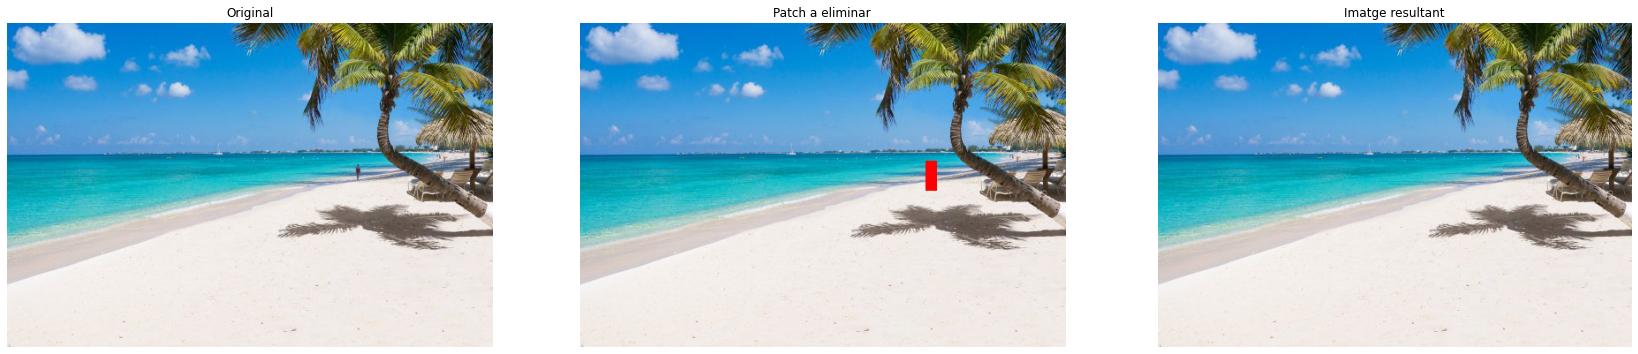

In [17]:
im = plt.imread('img/beach.jpg')/255
patch = [(156,391), (189,403)]

remove_patch(im, patch)

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>

<p>
L'entrega es farà a través del campus virtual. Teniu fins el dia <b>8 de Desembre a les 23:55</b> per entregar la pràctica. A la tasca que obrirem al campus, <b>només heu d'entregar aquest fitxer .ipynb</b>. El notebook ha de tenir com a nom:
</p>
<p>
    <code>L4_Grup_Cognom_Nom.ipynb</code>
</p>
    <br>
On 'Grup' és una sola lletra que identifica el grup on esteu matriculats. Els grups disponibles són: A, B, C, F.

És imprescindible que respecteu el format de les funcions i que el vostre codi estigui degudament comentat.<br><br>
</div>